# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [78]:
import numpy as np
import pandas as pd
from tensorflow.keras import models, layers

In [79]:
dataset = pd.read_csv("compresive_strength_concrete.csv")
dataset.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [80]:
dataset.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [81]:
dataset = dataset.astype("float32")

dataset.dtypes

Cement (component 1)(kg in a m^3 mixture)                float32
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float32
Fly Ash (component 3)(kg in a m^3 mixture)               float32
Water  (component 4)(kg in a m^3 mixture)                float32
Superplasticizer (component 5)(kg in a m^3 mixture)      float32
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float32
Fine Aggregate (component 7)(kg in a m^3 mixture)        float32
Age (day)                                                float32
Concrete compressive strength(MPa, megapascals)          float32
dtype: object

In [82]:
train_size = int(dataset.shape[0] * 0.5)
test_size = int(dataset.shape[0] * 0.3) + train_size

y = np.asarray(dataset[["Concrete compressive strength(MPa, megapascals) "]])
x = np.asarray(dataset.drop(["Concrete compressive strength(MPa, megapascals) "], axis=1))

y_train, y_test, y_validation = y[:train_size], y[train_size:test_size], y[test_size:]
x_train, x_test, x_validation = x[:train_size], x[train_size:test_size], x[test_size:]
input_shape = x_train[0].shape

In [83]:
mean = x_train.mean()
x_train -= mean
std  = x_train.std()
x_train /= std

In [84]:
x_test -= mean
x_test /= std
x_validation -= mean
x_validation /= std


In [85]:
print(y_train)
print(y_test)
print(y_validation)

[[79.99]
 [61.89]
 [40.27]
 [41.05]
 [44.3 ]
 [47.03]
 [43.7 ]
 [36.45]
 [45.85]
 [39.29]
 [38.07]
 [28.02]
 [43.01]
 [42.33]
 [47.81]
 [52.91]
 [39.36]
 [56.14]
 [40.56]
 [42.62]
 [41.84]
 [28.24]
 [ 8.06]
 [44.21]
 [52.52]
 [53.3 ]
 [41.15]
 [52.12]
 [37.43]
 [38.6 ]
 [55.26]
 [52.91]
 [41.72]
 [42.13]
 [53.69]
 [38.41]
 [30.08]
 [37.72]
 [42.23]
 [36.25]
 [50.46]
 [43.7 ]
 [39.  ]
 [53.1 ]
 [41.54]
 [35.08]
 [15.05]
 [40.76]
 [26.26]
 [32.82]
 [39.78]
 [46.93]
 [33.12]
 [49.19]
 [14.59]
 [14.64]
 [41.93]
 [ 9.13]
 [50.95]
 [33.02]
 [54.38]
 [51.73]
 [ 9.87]
 [50.66]
 [48.7 ]
 [55.06]
 [44.7 ]
 [30.28]
 [40.86]
 [71.99]
 [34.4 ]
 [28.8 ]
 [33.4 ]
 [36.3 ]
 [29.  ]
 [37.8 ]
 [40.2 ]
 [33.4 ]
 [28.1 ]
 [41.3 ]
 [33.4 ]
 [25.2 ]
 [41.1 ]
 [35.3 ]
 [28.3 ]
 [28.6 ]
 [35.3 ]
 [24.4 ]
 [35.3 ]
 [39.3 ]
 [40.6 ]
 [35.3 ]
 [24.1 ]
 [46.2 ]
 [42.8 ]
 [49.2 ]
 [46.8 ]
 [45.7 ]
 [55.6 ]
 [54.9 ]
 [49.2 ]
 [34.9 ]
 [46.9 ]
 [49.2 ]
 [33.4 ]
 [54.1 ]
 [55.9 ]
 [49.8 ]
 [47.1 ]
 [55.9 ]
 [38.  ]
 

In [93]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(18, input_shape=input_shape, activation="relu"))
    model.add(layers.Dense(10, activation="relu"))
    model.add(layers.Dense(8, activation="relu"))
    model.add(layers.Dense(3, activation="relu"))
    model.add(layers.Dense(1))
    
    model.compile(metrics=["mae"], loss="mse", optimizer="rmsprop")
    
    return model

In [94]:
model = build_model()

history = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=100, batch_size=10)

Epoch 1/100
52/52 [==============================] - 2s 12ms/step - loss: 2048.7480 - mae: 41.8155 - val_loss: 1049.5582 - val_mae: 29.9451
Epoch 2/100
52/52 [==============================] - 0s 8ms/step - loss: 1830.5183 - mae: 38.8428 - val_loss: 733.7169 - val_mae: 24.0972
Epoch 3/100
52/52 [==============================] - 0s 8ms/step - loss: 1253.5629 - mae: 31.2253 - val_loss: 341.1043 - val_mae: 15.4320
Epoch 4/100
52/52 [==============================] - 1s 10ms/step - loss: 681.1656 - mae: 21.2415 - val_loss: 153.5116 - val_mae: 9.6421
Epoch 5/100
52/52 [==============================] - 0s 9ms/step - loss: 320.9812 - mae: 14.5849 - val_loss: 210.1980 - val_mae: 11.4246
Epoch 6/100
52/52 [==============================] - 0s 7ms/step - loss: 283.2883 - mae: 13.6324 - val_loss: 209.8316 - val_mae: 11.4576
Epoch 7/100
52/52 [==============================] - 0s 9ms/step - loss: 310.4921 - mae: 14.5619 - val_loss: 172.6571 - val_mae: 10.1373
Epoch 8/100
52/52 [=================

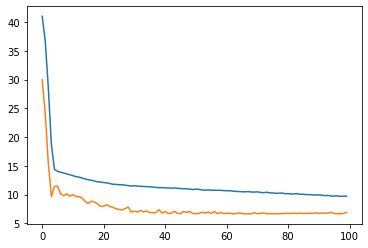

In [95]:
import matplotlib.pyplot as plt

plt.plot(range(100), history.history["mae"])
plt.plot(range(100), history.history["val_mae"])
plt.show()

In [96]:
prediction = model.evaluate(x_test, y_test)
print(prediction)

10/10 [==============================] - 0s 2ms/step - loss: 250.9956 - mae: 13.6909
[250.99562072753906, 13.690910339355469]


In [97]:
model.predict([[ 0.19933844, -0.85647184, -0.8467326 ,  1.003676  , -1.0386382 ,
        0.0139037 ,  0.54155266, -0.27959728]])

array([[5.136503]], dtype=float32)